In [ ]:
"""
Machine Learning Homework 1
Done by:
Mariana Santana 106992
Pedro Leal 106154
LEIC-A
"""

#### II. Programming
#### Consider the diabetes.arff data available at the homework tab, comprising 8 biological features to classify 768 patients into 2 classes (normal, diabetes).

In [30]:

"""
General imports and variables for all exercises; run this cell before any other
"""

import arff, pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, mutual_info_classif

dataset = arff.load(open("diabetes.arff", "r"))
attribute_names = [attr[0] for attr in dataset['attributes']]
data_dict = {attr: [] for attr in attribute_names}

for row in dataset['data']:
    for i, value in enumerate(row):
        data_dict[attribute_names[i]].append(value)

df = pd.DataFrame(data_dict)

X, y = df.drop('Outcome', axis=1), df['Outcome']

#### 1. ANOVA is a statistical test that can be used to assess the discriminative power of a single input variable. Using f_classif from sklearn, identify the input variables with the worst and best discriminative power. Plot their class-conditional probability density functions.

Text(0.5, 0, 'BloodPressure')

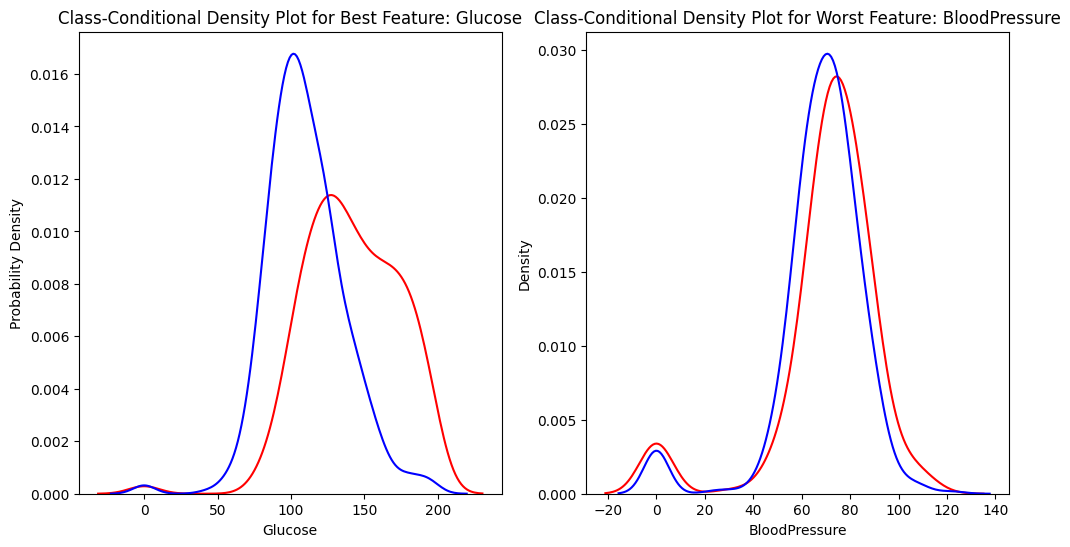

In [32]:
f_values, p_values = f_classif(X, y)

feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Value': f_values,
    'p-Value': p_values
})

feature_scores = feature_scores.sort_values(by='F-Value', ascending=False)
best_feature = feature_scores.iloc[0]['Feature']
worst_feature = feature_scores.iloc[-1]['Feature']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(df[best_feature][df['Outcome'] == '1'], label='Diabetes', color='r')
sns.kdeplot(df[best_feature][df['Outcome'] == '0'], label='Normal', color='b')
plt.title(f'Class-Conditional Density Plot for Best Feature: {best_feature}')
plt.xlabel(best_feature)
plt.ylabel('Probability Density')
plt.subplot(1, 2, 2)
sns.kdeplot(df[worst_feature][df['Outcome'] == '1'], label='Diabetes', color='r')
sns.kdeplot(df[worst_feature][df['Outcome'] == '0'], label='Normal', color='b')
plt.title(f'Class-Conditional Density Plot for Worst Feature: {worst_feature}')
plt.xlabel(worst_feature)


#### 2. Using a stratified 80-20 training-testing split with a fixed seed (random_state=1), assess in a single plot both the training and testing accuracies of a decision tree with minimum sample split in {2,5,10,20,30,50,100} and the remaining parameters as default. Note that split thresholding of numeric variables in decision trees is non-deterministic in sklearn, hence you may opt to average the results using 10 runs per parameterization.

In [ ]:
min_samples_split_values = [2, 5, 10, 20, 30, 50, 100]
n_runs, random_state = 10, 1
train_accuracies, test_accuracies = [], []

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, stratify=y, random_state=random_state)

feature_scores = mutual_info_classif(X_train, y_train)
sorted_features = np.argsort(feature_scores)

for m in min_samples_split_values:

    train_m_acc, test_m_acc = [], []
    predictor = tree.DecisionTreeClassifier(min_samples_split=m, random_state=random_state)

    for _ in range(n_runs):
        top_features = sorted_features[-m:]
        X_m_train, X_m_test = X_train.iloc[:, top_features], X_test.iloc[:, top_features]

        predictor.fit(X_m_train, y_train)
        train_m_acc.append(metrics.accuracy_score(y_train, predictor.predict(X_m_train)))
        test_m_acc.append(metrics.accuracy_score(y_test, predictor.predict(X_m_test)))
    
    train_accuracies.append(np.mean(train_m_acc))
    test_accuracies.append(np.mean(test_m_acc))

print("Train accuracies: ", train_accuracies, "\nTest accuracies: ", test_accuracies)

plt.figure(figsize=(12, 6))
plt.plot(min_samples_split_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(min_samples_split_values, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Training and Testing Accuracies')
plt.xlabel('Minimum Sample Splits')
plt.ylim(0.5, 1.1)
plt.grid()


#### 3. Critically analyze these results, including the generalization capacity across settings.
With the analysis of the resulting plot from exercise 2, it is possible to assess the relation between the training accuracy and the testing accuracy.

For lower min_sample_split values (0-20) there is an inverse relation between the accuracies, that is, the model gets overfitted because it memorizes the data instead of generalizing patterns. 

On the other hand, for values beyond 40 the testing accuracy drops slightly, suggesting underfitting as the model becomes too simple to capture data patterns effectively.

In conclusion, for this particular situation, the best value for min_sample_split would be around 30 becuase that's where we see a peak in testing accuracy suggesting a better model overall, balancing between high training accuracy and good generalization to new data.

#### 4. To deploy the predictor, a healthcare provider opted to learn a single decision tree (random_state=1) using all available data and ensuring that the maximum depth would be 3 in order to avoid overfitting risks. 
#### i. Plot the decision tree.

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=1)
clf.fit(X, y)

plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Normal', 'Diabetes'], filled=True)
plt.show()


### ii. Explain what characterizes diabetes by identifying the conditional associations together with their posterior probabilities.

The main features that characterize diabetes are: Glucose, BMI and Age.

P(class = Diabetes) = 3/4, when Glucose <= 127.5, Age <= 28.5 and BMI > 45.4.
P(class = Diabetes) = 174/283, when Glucose > 127.5.
P(class = Diabetes) = 150/207, when Glucose > 127.5 and BMI > 29.95.
P(class = Diabetes) = 80/92, when Glucose > 157.5 and BMI > 29.95.
P(class = Diabetes) = 70/115, when 127.5 < Glucose <= 157.5 and BMI > 29.95.
P(class = Diabetes) = 18/35, when Glucose > 145.5 and BMI <= 29.95.

### PERGUNTAR
